In [20]:
import pandas as pd

df = pd.read_csv("transactions.csv")
df


,amount,transaction_type,location,device,fraud
0,1200,online,international,mobile,1
1,50,offline,local,card,0
2,200,online,local,desktop,0
3,5000,online,international,mobile,1
4,20,offline,local,card,0
5,300,online,local,mobile,0
6,7000,online,international,desktop,1
7,15,offline,local,card,0
8,450,online,local,desktop,0
9,9000,online,international,mobile,1


In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['transaction_type'] = le.fit_transform(df['transaction_type'])
df['location'] = le.fit_transform(df['location'])
df['device'] = le.fit_transform(df['device'])

df


,amount,transaction_type,location,device,fraud
0,1200,1,0,2,1
1,50,0,1,0,0
2,200,1,1,1,0
3,5000,1,0,2,1
4,20,0,1,0,0
5,300,1,1,2,0
6,7000,1,0,1,1
7,15,0,1,0,0
8,450,1,1,1,0
9,9000,1,0,2,1


In [22]:
X = df.drop('fraud', axis=1)
y = df['fraud']


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [25]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [26]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.3, random_state=42)
df['anomaly'] = iso.fit_predict(X)

df


,amount,transaction_type,location,device,fraud,anomaly
0,1200,1,0,2,1,1
1,50,0,1,0,0,-1
2,200,1,1,1,0,1
3,5000,1,0,2,1,1
4,20,0,1,0,0,1
5,300,1,1,2,0,1
6,7000,1,0,1,1,-1
7,15,0,1,0,0,1
8,450,1,1,1,0,1
9,9000,1,0,2,1,-1


In [27]:
df[['fraud', 'anomaly']]


,fraud,anomaly
0,1,1
1,0,-1
2,0,1
3,1,1
4,0,1
5,0,1
6,1,-1
7,0,1
8,0,1
9,1,-1


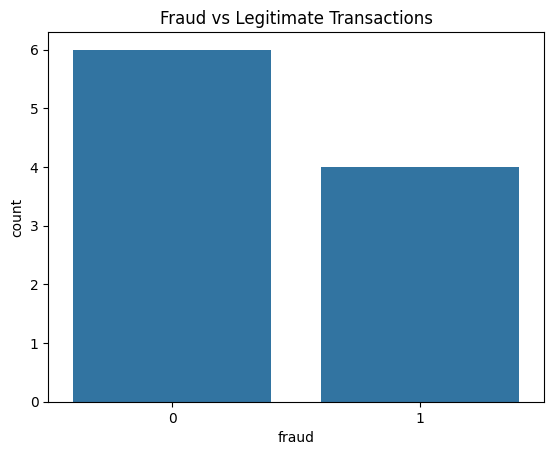

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='fraud', data=df)
plt.title("Fraud vs Legitimate Transactions")
plt.show()


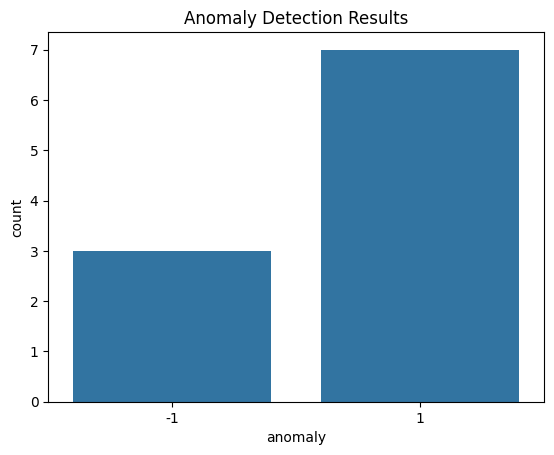

In [29]:
sns.countplot(x='anomaly', data=df)
plt.title("Anomaly Detection Results")
plt.show()


In [30]:
new_transaction = [[6000, 1, 1, 1]]  # high amount, online, international, mobile

prediction = model.predict(new_transaction)
print("Fraud Prediction:", "Fraud" if prediction[0] == 1 else "Legitimate")


Fraud Prediction: Fraud


E:\SrisTech_AI_Intership\ai_env\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [31]:
new_transaction = pd.DataFrame(
    [[9000, 1, 1, 1]],
    columns=X.columns
)

prediction = model.predict(new_transaction)
print("Prediction:", "Fraud" if prediction[0] == 1 else "Legitimate")


Prediction: Fraud


In [32]:
new_transaction = pd.DataFrame(
    [[50, 0, 0, 0]],
    columns=X.columns
)

prediction = model.predict(new_transaction)
print("Prediction:", "Fraud" if prediction[0] == 1 else "Legitimate")


Prediction: Legitimate


In [33]:
df[['amount', 'fraud', 'anomaly']]


,amount,fraud,anomaly
0,1200,1,1
1,50,0,-1
2,200,0,1
3,5000,1,1
4,20,0,1
5,300,0,1
6,7000,1,-1
7,15,0,1
8,450,0,1
9,9000,1,-1


In [ ]:
## Limitations
- The dataset used is small and synthetic.
- Model accuracy is limited due to limited transaction diversity.
- Real-world fraud patterns are more complex.
- The system does not handle real-time streaming data.


In [ ]:
## Future Scope
- Integration with real-time transaction streams.
- Use of deep learning models for better pattern recognition.
- Larger datasets for improved accuracy.
- Deployment as a scalable fraud monitoring system.


In [ ]:
## Conclusion
The AI-powered fraud detection system successfully identifies fraudulent transactions using machine learning classification and anomaly detection techniques. The system demonstrates how AI can enhance traditional fraud detection mechanisms by identifying complex patterns in transaction data.
